In [1]:
# 0. Install / Imports
try:
    import tensorflow as tf
except:
    !pip install -q tensorflow
    import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, utils, optimizers, losses, callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
# 1. Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# show class distribution train
dist = pd.Series(y_train).value_counts().sort_index()
print("Distribution (train):")
print(dist)

Distribution (train):
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


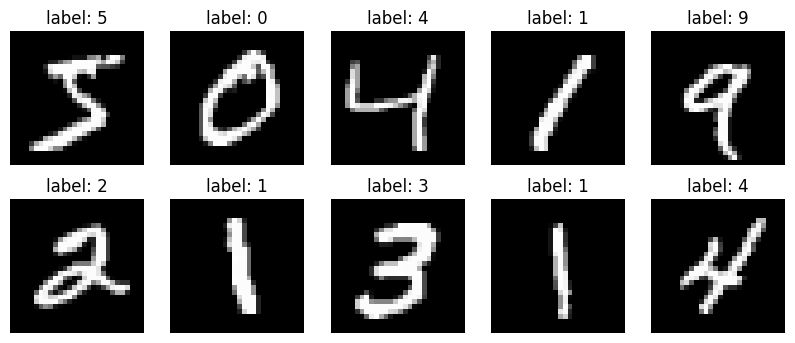

In [4]:
# Visualize some images
fig, axes = plt.subplots(2,5, figsize=(10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"label: {y_train[i]}")
    ax.axis('off')
plt.show()

In [5]:
# 2. Preprocess for CNN (keep as 28x28 grayscale)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

In [6]:
# Add channel dim
x_train = np.expand_dims(x_train, -1)  # shape (N,28,28,1)
x_test  = np.expand_dims(x_test, -1)

num_classes = 10
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat  = utils.to_categorical(y_test, num_classes)

In [20]:
def build_cnn_mnist(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential(name="Simple_CNN_MNIST")
    model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    # Fix: Change kernel size from (5,5) to (3,3)
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

model = build_cnn_mnist()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# 4. Compile & Train
batch_size = 128
epochs = 8

model.compile(optimizer=optimizers.Adam(),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
# simple callbacks
cb = [
    callbacks.ModelCheckpoint("best_cnn_mnist.h5", save_best_only=True, monitor='val_accuracy'),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

history = model.fit(x_train, y_train_cat,
                    validation_split=0.1,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=cb)

Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.8356 - loss: 0.5277

422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 333ms/step - accuracy: 0.8358 - loss: 0.5270 - val_accuracy: 0.9777 - val_loss: 0.0816 - learning_rate: 0.0010
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.9808 - loss: 0.0630

422/422 ━━━━━━━━━━━━━━━━━━━━ 140s 329ms/step - accuracy: 0.9808 - loss: 0.0630 - val_accuracy: 0.9877 - val_loss: 0.0464 - learning_rate: 0.0010
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.9879 - loss: 0.0393

422/422 ━━━━━━━━━━━━━━━━━━━━ 136s 323ms/step - accuracy: 0.9879 - loss: 0.0393 - val_accuracy: 0.9912 - val_loss: 0.0323 - learning_rate: 0.0010
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 326ms/step - accuracy: 0.9908 - loss: 0.0288 - val_accuracy: 0.9893 - val_loss: 0.0369 - learning_rate: 0.0010
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9927 - loss: 0.0218
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 324ms/step - accuracy: 0.9927 - loss: 0.0218 - val_accuracy: 0.9897 - val_loss: 0.0325 - learning_rate: 0.0010
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9961 - loss: 0.0124

422/422 ━━━━━━━━━━━━━━━━━━━━ 138s 327ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9935 - val_loss: 0.0247 - learning_rate: 5.0000e-04
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 325ms/step - accuracy: 0.9979 - loss: 0.0079 - val_accuracy: 0.9922 - val_loss: 0.0294 - learning_rate: 5.0000e-04
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.9984 - loss: 0.0058
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 323ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.9933 - val_loss: 0.0297 - learning_rate: 5.0000e-04


In [17]:
# Build the model to inspect its architecture and output shapes
model = build_cnn_mnist()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Simple_CNN_MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        57,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,270 (833.09 KB)

 Trainable params: 213,270 (833.09 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 5. Evaluate
model.load_weights("best_cnn_mnist.h5")
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test acc: {test_acc:.4f}, loss: {test_loss:.4f}")

313/313 - 8s - 26ms/step - accuracy: 0.9930 - loss: 0.0217
Test acc: 0.9930, loss: 0.0217


In [24]:
# Confusion matrix / classification report
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
# 6. Transfer Learning examples (adapt MNIST to 224x224x3)
# Convert grayscale 28x28 -> 224x224x3 by resizing and repeating channel
import tensorflow.keras.backend as K
def mnist_to_rgb224(x):
    # x: (N,28,28) or (N,28,28,1)
    import cv2
    N = x.shape[0]
    out = np.zeros((N,224,224,3), dtype=np.float32)
    for i in range(N):
        img = x[i].squeeze() * 255.0
        img_resized = cv2.resize(img, (224,224))
        img_rgb = np.stack([img_resized, img_resized, img_resized], axis=-1)
        out[i] = img_rgb
    return out

In [26]:
# We'll use a small subset for the TL demo to keep runtime low
N_demo = 2000
x_tl_train = mnist_to_rgb224(x_train[:N_demo])
y_tl_train = y_train[:N_demo]
x_tl_val   = mnist_to_rgb224(x_test[:1000])
y_tl_val   = y_test[:1000]

In [27]:
# VGG16-based classifier (feature extractor)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg_base.trainable = False  # freeze

vgg_model = models.Sequential([
    layers.Input((224,224,3)),
    layers.Lambda(vgg_preprocess),
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training VGG-based model (demo subset)...")
vgg_model.fit(x_tl_train, y_tl_train, validation_data=(x_tl_val, y_tl_val), epochs=5, batch_size=64)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG-based model (demo subset)...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1762s 56s/step - accuracy: 0.2481 - loss: 3.1241 - val_accuracy: 0.7750 - val_loss: 0.7202
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1793s 57s/step - accuracy: 0.7784 - loss: 0.7084 - val_accuracy: 0.8500 - val_loss: 0.4558
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1791s 56s/step - accuracy: 0.8301 - loss: 0.5420 - val_accuracy: 0.8800 - val_loss: 0.3663
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1794s 57s/step - accuracy: 0.8804 - loss: 0.3823 - val_accuracy: 0.9090 - val_loss: 0.2983
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1822s 57s/step - accuracy: 0.9189 - loss: 0.2820 - val_accuracy: 0.9210 - val_loss: 0.2591


In [28]:
# ResNet50-based classifier (feature extractor)
res_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
res_base.trainable = False

res_model = models.Sequential([
    layers.Input((224,224,3)),
    layers.Lambda(resnet_preprocess),
    res_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
res_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training ResNet50-based model (demo subset)...")
res_model.fit(x_tl_train, y_tl_train, validation_data=(x_tl_val, y_tl_val), epochs=5, batch_size=64)

print("All done.")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training ResNet50-based model (demo subset)...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 558s 17s/step - accuracy: 0.4522 - loss: 1.7023 - val_accuracy: 0.7870 - val_loss: 0.6161
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 576s 18s/step - accuracy: 0.8382 - loss: 0.5081 - val_accuracy: 0.8870 - val_loss: 0.3773
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 620s 18s/step - accuracy: 0.8947 - loss: 0.3447 - val_accuracy: 0.9200 - val_loss: 0.2881
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 540s 17s/step - accuracy: 0.9177 - loss: 0.2689 - val_accuracy: 0.9220 - val_loss: 0.2485
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 583s 18s/step - accuracy: 0.9313 - loss: 0.2340 - val_accuracy: 0.9380 - val_loss: 0.2125
All done.


In [30]:
# =========================
# TP CNN - PyTorch
# =========================

# 0. Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


In [31]:
# 1. Data transforms
transform = transforms.Compose([
    transforms.ToTensor(), # will produce [0,1] and shape (1,28,28)
    # Optionally normalize: transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=2)

100%|██████████| 9.91M/9.91M [00:00<00:00, 134MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 31.0MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 84.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.19MB/s]


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, input_shape=(1,28,28), num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)  # padding=2 → "same"
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding=2)

        # calcul automatique de la taille du flatten
        with torch.no_grad():
            dummy = torch.zeros(1, *input_shape)
            out = self._forward_conv(dummy)
            n_features = out.view(1, -1).size(1)

        self.fc4 = nn.Linear(n_features, 100)
        self.fc5 = nn.Linear(100, num_classes)

    def _forward_conv(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        return x

    def forward(self, x):
        x = self._forward_conv(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)


In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
print(model)


SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc4): Linear(in_features=576, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)


In [37]:
# 3. Training setup
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.NLLLoss()

In [38]:
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for data, target in loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.size(0)
    return total_loss / len(loader.dataset)

In [39]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    preds = []
    labels = []
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item() * data.size(0)
            preds.append(output.argmax(dim=1).cpu().numpy())
            labels.append(target.cpu().numpy())
    preds = np.concatenate(preds)
    labels = np.concatenate(labels)
    acc = (preds == labels).mean()
    return total_loss/len(loader.dataset), acc, preds, labels

In [40]:
# 4. Run training
epochs = 8
for epoch in range(1, epochs+1):
    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc, _, _ = evaluate(model, test_loader, criterion)
    print(f"Epoch {epoch}: train_loss={train_loss:.4f} val_loss={val_loss:.4f} val_acc={val_acc:.4f}")

Epoch 1: train_loss=0.2262 val_loss=0.0491 val_acc=0.9840
Epoch 2: train_loss=0.0520 val_loss=0.0395 val_acc=0.9878
Epoch 3: train_loss=0.0349 val_loss=0.0263 val_acc=0.9913
Epoch 4: train_loss=0.0261 val_loss=0.0239 val_acc=0.9913
Epoch 5: train_loss=0.0209 val_loss=0.0325 val_acc=0.9889
Epoch 6: train_loss=0.0169 val_loss=0.0238 val_acc=0.9922
Epoch 7: train_loss=0.0133 val_loss=0.0253 val_acc=0.9926
Epoch 8: train_loss=0.0123 val_loss=0.0295 val_acc=0.9907


In [41]:
# 5. Final evaluation + classification report
_, acc, preds, labels = evaluate(model, test_loader, criterion)
print("Test accuracy:", acc)
print(classification_report(labels, preds))

Test accuracy: 0.9907
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

